<ipython-input-2-36e29569bc52>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['income'].replace({'<=50K':0,'>50K':1},inplace=True,regex=True)


age : 0.24199813626611844
capital-gain : 0.221196214548059
capital-loss : 0.15005330839729764
hours-per-week : 0.2294801298885089
fnlwgt : -0.008957423359171629
    age          workclass      education          marital-status  \
0    39          State-gov      Bachelors           Never-married   
1    50   Self-emp-not-inc      Bachelors      Married-civ-spouse   
2    38            Private        HS-grad                Divorced   
3    53            Private           11th      Married-civ-spouse   
4    28            Private      Bachelors      Married-civ-spouse   
5    37            Private        Masters      Married-civ-spouse   
6    49            Private            9th   Married-spouse-absent   
7    52   Self-emp-not-inc        HS-grad      Married-civ-spouse   
8    31            Private        Masters           Never-married   
9    42            Private      Bachelors      Married-civ-spouse   
10   37            Private   Some-college      Married-civ-spouse   
11   30    

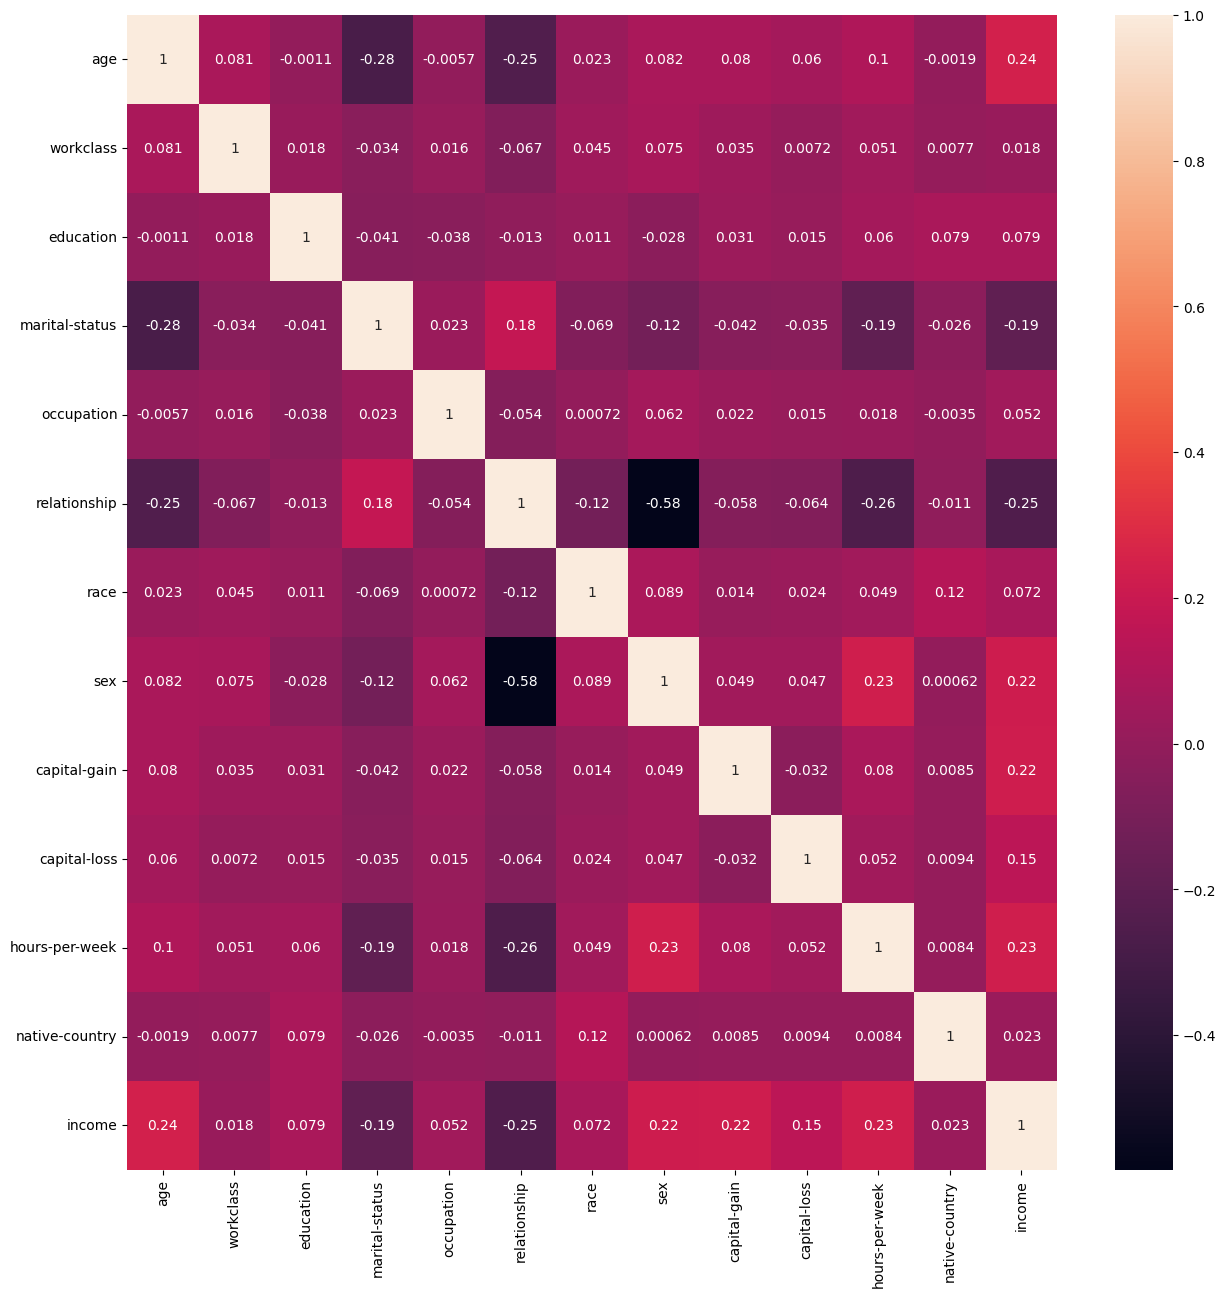

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Import data and header
df = pd.read_csv("adult.data",header=None)
df.columns = [
    "age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race",
    "sex","capital-gain","capital-loss","hours-per-week","native-country","income"
    ]

#Clean up data
df = df.replace(r'\?', np.nan, regex=True)
df_new=df.dropna(axis=0)

#Can also use encode data method
df_new['income'].replace({'<=50K':0,'>50K':1},inplace=True,regex=True)
df_new=df_new.drop('education-num',axis=1)

import scipy.stats as stats

# Check the correlation between a binary variable and continuous variables
a = ['age','capital-gain','capital-loss','hours-per-week','fnlwgt']

for i in a:

    print(i,':',stats.pointbiserialr(df_new['income'],df_new[i])[0])

df_new=df_new.drop('fnlwgt',axis=1)
print (df_new.head(15))
print (df_new.info())1

#Encode data
enc = LabelEncoder()
df_new["workclass"] = enc.fit_transform(df_new["workclass"])
df_new["education"] = enc.fit_transform(df_new["education"])
df_new["marital-status"] = enc.fit_transform(df_new["marital-status"])
df_new["occupation"] = enc.fit_transform(df_new["occupation"])
df_new["relationship"] = enc.fit_transform(df_new["relationship"])
df_new["race"] = enc.fit_transform(df_new["race"])
df_new["sex"] = enc.fit_transform(df_new["sex"])
df_new["native-country"] = enc.fit_transform(df_new["native-country"])

print (df_new.info())
print (df_new.head(15))
print (df_new.corr())

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_new.corr(), annot=True, ax=ax)
plt.show()

#Select variables
y = df_new["income"].values

#Variables with highest correlation are selected
X = df_new[["age","marital-status","relationship","sex","capital-gain","hours-per-week"]]

#Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40, stratify=y)

#Scale data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



In [3]:
#Calculate ideal K to use for K Nearest Neighbors algorithm
neighbors = np.arange (1, 200)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    #Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(scaled_X_train, y_train)

    #Calculate accuracy
    train_accuracies[neighbor] = knn.score(scaled_X_train, y_train)
    test_accuracies[neighbor] = knn.score(scaled_X_test, y_test)

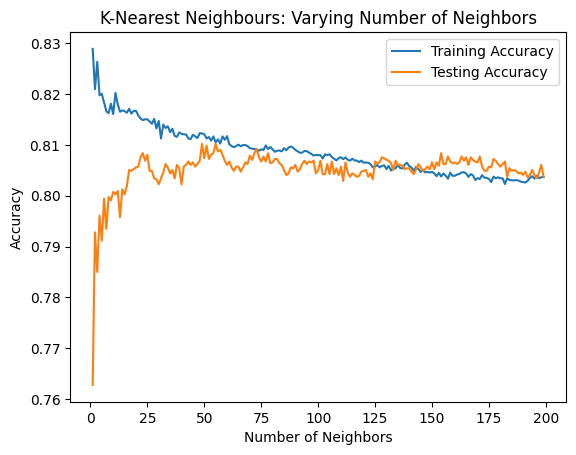

In [4]:
#Plot test results for training vs test accuracy
plt.title("K-Nearest Neighbours: Varying Number of Neighbors")
#Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
#Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [5]:
#Create neighbours classifier with K value based on previous test results
knn = KNeighborsClassifier(n_neighbors=125)
#Fit the classifier to the training data
knn.fit(scaled_X_train,y_train)
# Print the accuracy
print(knn.score(scaled_X_test, y_test))

0.8067296535720205


In [6]:
#Print other evaluation metrics
y_pred = knn.predict(scaled_X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4531
           1       0.66      0.47      0.55      1502

    accuracy                           0.81      6033
   macro avg       0.75      0.69      0.71      6033
weighted avg       0.79      0.81      0.79      6033



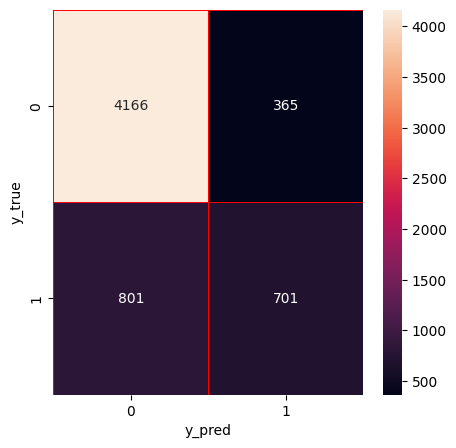

In [7]:
#Confusion matrix
y_pred = knn.predict(scaled_X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [8]:
from sklearn.naive_bayes import GaussianNB

#Implement Naive Bayes algorithm

gnb = GaussianNB()
y_pred = gnb.fit(scaled_X_train, y_train).predict(scaled_X_test)
#Print the accuracy
print(gnb.score(scaled_X_test, y_test))

0.7936350074589756


In [9]:
#Print other evaluation metrics

y_pred = gnb.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4531
           1       0.79      0.23      0.36      1502

    accuracy                           0.79      6033
   macro avg       0.79      0.61      0.62      6033
weighted avg       0.79      0.79      0.75      6033



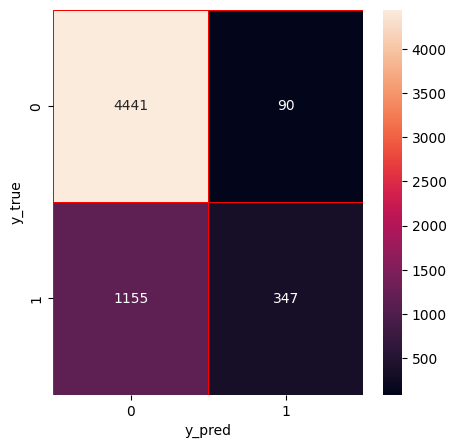

In [10]:
#Confusion matrix
y_pred = gnb.predict(scaled_X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=8,max_depth=10)

# Train Decision Tree Classifer
y_pred = clf.fit(scaled_X_train, y_train).predict(scaled_X_test)

#Print the accuracy
print(clf.score(scaled_X_test, y_test))

y_pred = clf.predict(scaled_X_test)


0.8188297696005304


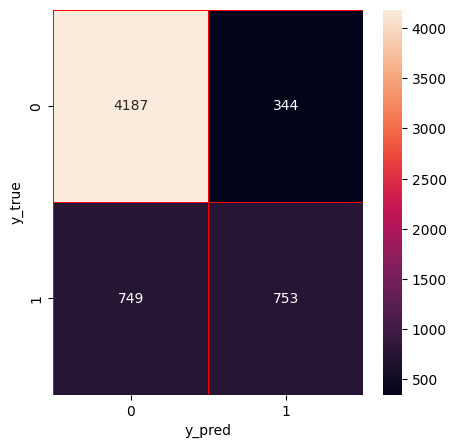

In [12]:
#Confusion matrix
y_pred = clf.predict(scaled_X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()